<a href="https://colab.research.google.com/github/Abderrahmane-Br/Hybrid-model-for-time-series-forecasting/blob/CNN-LSTM/LSTM_CNN(lstm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
elect_data = pd.read_csv("/content/BrentSpotPrice.csv", index_col="Date")
elect_data.index = pd.to_datetime(elect_data.index)
print(elect_data)

            Brent Spot Price
Date                        
1987-05-15             18.58
1987-05-22             18.54
1987-05-29             18.60
1987-06-05             18.70
1987-06-12             18.75
...                      ...
2016-01-08             34.19
2016-01-15             29.10
2016-01-22             27.76
2016-01-29             31.75
2016-02-05             32.18

[1500 rows x 1 columns]


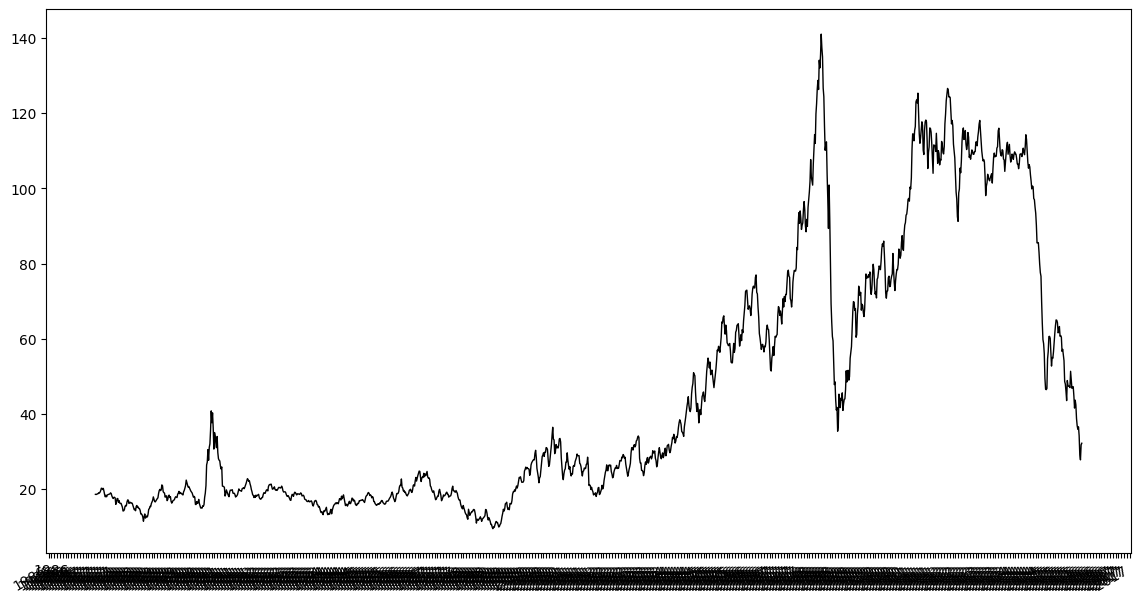

In [16]:
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = [14, 8]
loc = mdates.MonthLocator()
min_loc = mdates.MonthLocator(3)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_minor_locator(min_loc)
ax.tick_params(colors="black")
plt.xticks(rotation=45)
fig.autofmt_xdate()

ax.plot(elect_data,'-', color="black", linewidth=1)
# plt.savefig('../test1.png', dpi=300)

In [216]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()

        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, input):
        # hidden = (torch.zeros(self.hidden_size, 1))
        # print('hidden ', hidden)
        out, (hidden, cell) = self.lstm(input.view(len(input), 1))
        # print('hidden2 ', hidden)
        out = self.linear(out)
        return out

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(elect_data)
train_scaled = scaler.transform(elect_data)
# inputs = torch.tensor(elect_data["Brent Spot Price"], dtype=torch.float32)
inputs = torch.tensor(train_scaled, dtype=torch.float32)

In [227]:
model = CNN_LSTM(1, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)
loss_fun = nn.MSELoss()
epochs = 250

In [228]:
for epoch in range(epochs): 
    out = model(inputs)
    loss = loss_fun(out, inputs)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 == 0: 
        print(loss)

tensor(0.0837, grad_fn=<MseLossBackward0>)
tensor(0.0215, grad_fn=<MseLossBackward0>)
tensor(0.0056, grad_fn=<MseLossBackward0>)
tensor(0.0035, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0010, grad_fn=<MseLossBackward0>)
tensor(0.0009, grad_fn=<MseLossBackward0>)
tensor(0.0007, grad_fn=<MseLossBackward0>)
tensor(0.0005, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)
tensor(0.00

[[22.915375]
 [20.84077 ]
 [19.782637]
 ...
 [30.775648]
 [30.047272]
 [30.259708]]


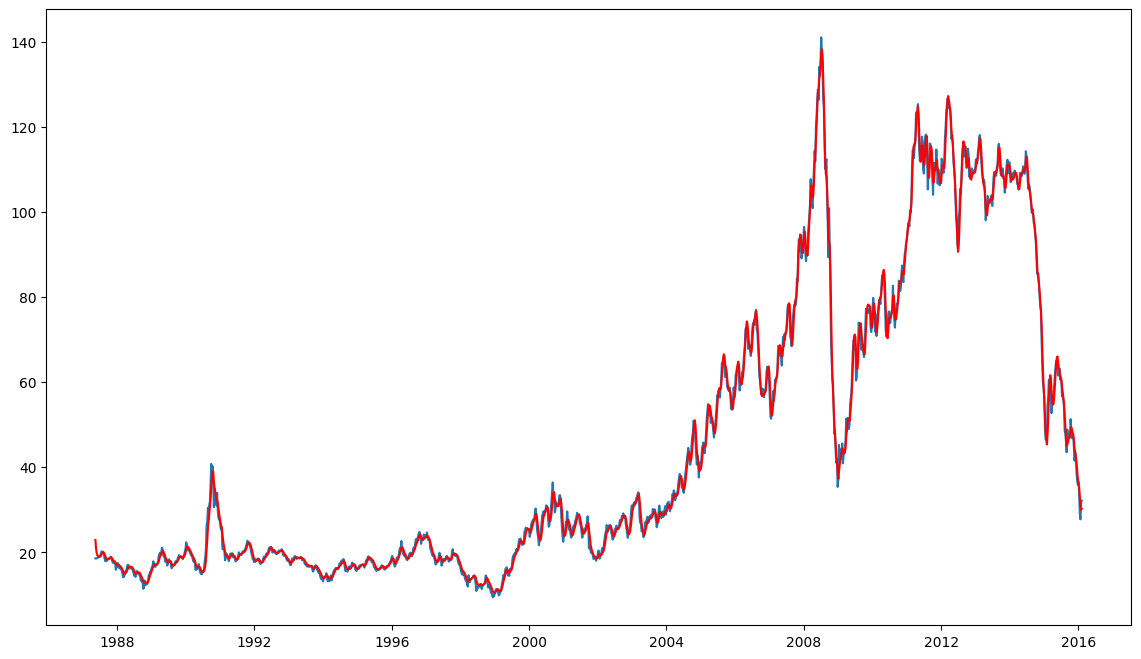

In [229]:
# results = out.detach()
# results = scaler.inverse_transform([train_scaled[0], results])
results = scaler.inverse_transform(np.array(out.detach()))
print(results)
plt.plot(elect_data)
results_df = pd.DataFrame(data = results, index=elect_data.index)
# print(results_df)
plt.plot(results_df, color="red")